## Xarray example Jupyter Notebook

Runs in _jupyter lab_ notebook.


## Xarray instalation
Install Xarray and some of its dependencies if not already installed.

``` conda install -c conda-forge xarray==0.20.2 dask netCDF4 bottleneck pooch```

It may take a while resolving installation environments.
If it is successful, will install other package dependecies.

Xarray comes with a collection of datasets to explore: [xarray.tutorial.open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html)

Available datasets:

`"air_temperature"`: NCEP reanalysis subset

`"air_temperature_gradient"`: NCEP reanalysis subset with approximate x,y gradients

`"basin_mask"`: Dataset with ocean basins marked using integers

`"ASE_ice_velocity"`: MEaSUREs InSAR-Based Ice Velocity of the Amundsen Sea Embayment, Antarctica, Version 1

`"rasm"`: Output of the Regional Arctic System Model (RASM)

`"ROMS_example"`: Regional Ocean Model System (ROMS) output

`"tiny"`: small synthetic dataset with a 1D data variable

`"era5-2mt-2019-03-uk.grib"`: ERA5 temperature data over the UK

`"eraint_uvz"`: data from ERA-Interim reanalysis, monthly averages of upper level data

`"ersstv5"`: NOAA’s Extended Reconstructed Sea Surface Temperature monthly averages


In [1]:
# Load required libraries

%matplotlib inline

import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import pooch
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the air_temperature dataset and define a xarray datastructure
# 4 x Daily Air temperature in degrees K at sigma level 995 
# (2013-01-01 to 2014-12-31)
# Spatial Coverage
# 2.5 degree x 2.5 degree global grids (144x73) [2.5 degree = 172.5 miles]
# 0.0E to 357.5E, 90.0N to 90.0S

ds = xr.tutorial.open_dataset('air_temperature')
#ds.info()


In [3]:
# Show the components of the xarray.Dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [4]:
# To see the values of  data variable: air
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
# Direct access to values
ds.air.values

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [6]:
# Underneath is a Numpy N dimensional Array
type(ds.air.values)

numpy.ndarray

In [7]:
# Show dimensions
ds.dims

Frozen({'lat': 25, 'time': 2920, 'lon': 53})

In [8]:
# Show coordinates
ds.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [9]:
# Show attributes
ds.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

We can use [xarray.DataArray.groupby](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) to caculate average monthly temperatures and anomalies.

In [10]:

# calculate monthly climatology
climatology = ds.groupby('time.month').mean('time')

# calculate anomalies 
anomalies = ds.groupby('time.month') - climatology


In [11]:
climatology

<xarray.Dataset>
Dimensions:  (lat: 25, month: 12, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 246.3 246.4 246.2 ... 297.6 297.6 297.5

In [12]:
anomalies

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
Data variables:
    air      (time, lat, lon) float32 -5.15 -3.886 -2.715 ... -1.375 -1.848

We can make plots directly with the DataArray

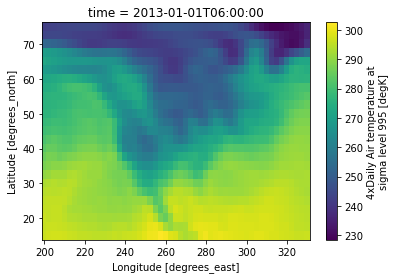

In [13]:
ds.air.isel(time=1).plot(x="lon");

In [14]:
# We can take time average of air temperature over all coordinates 
ds.air.mean("time")

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [15]:
df = ds.to_dataframe()
df.head()

air
lat  time       lon              
75.0 2013-01-01 200.0  241.199997
                202.5  242.500000
                205.0  243.500000
                207.5  244.000000
                210.0  244.099991

In [16]:
df.tail()

air
lat  time                lon              
15.0 2014-12-31 18:00:00 320.0  297.389984
                         322.5  297.190002
                         325.0  296.489990
                         327.5  296.190002
                         330.0  295.690002

In [17]:
df.describe()

,air
count,3.869000e+06
mean,2.870714e+02
std,1.728419e+01
min,2.210000e+02
25%,2.722000e+02
50%,2.852000e+02
75%,2.946000e+02
max,3.174000e+02


### Positional indexing


In [18]:
da = xr.DataArray(
     np.random.rand(4, 3),
     [
         ("time", pd.date_range("2000-01-01", periods=4)),
         ("space", ["IA", "IL", "IN"]),
     ],
   )

In [19]:
da

<xarray.DataArray (time: 4, space: 3)>
array([[0.04700447, 0.06209639, 0.65089196],
       [0.59588589, 0.4605865 , 0.89425307],
       [0.38036444, 0.54421378, 0.71697146],
       [0.46776527, 0.54673291, 0.56426702]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [20]:
da[:2]

<xarray.DataArray (time: 2, space: 3)>
array([[0.04700447, 0.06209639, 0.65089196],
       [0.59588589, 0.4605865 , 0.89425307]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [21]:

da[0,0]

<xarray.DataArray ()>
array(0.04700447)
Coordinates:
    time     datetime64[ns] 2000-01-01
    space    <U2 'IA'

In [22]:
da[:, [2, 1]]

<xarray.DataArray (time: 4, space: 2)>
array([[0.65089196, 0.06209639],
       [0.89425307, 0.4605865 ],
       [0.71697146, 0.54421378],
       [0.56426702, 0.54673291]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IN' 'IL'

### Indexing with dimension names

In [23]:
# index by integer array indices
da.isel(space=0, time=slice(None, 2))

<xarray.DataArray (time: 2)>
array([0.04700447, 0.59588589])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
    space    <U2 'IA'

In [24]:
# index by dimension coordinate labels
da.sel(time=slice("2000-01-01", "2000-01-02"))

<xarray.DataArray (time: 2, space: 3)>
array([[0.04700447, 0.06209639, 0.65089196],
       [0.59588589, 0.4605865 , 0.89425307]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [25]:
# Same as: da[0,0]
da.isel(space=[0], time=[0])

<xarray.DataArray (time: 1, space: 1)>
array([[0.04700447]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * space    (space) <U2 'IA'

In [26]:
da.sel(time="2000-01-01")

<xarray.DataArray (space: 3)>
array([0.04700447, 0.06209639, 0.65089196])
Coordinates:
    time     datetime64[ns] 2000-01-01
  * space    (space) <U2 'IA' 'IL' 'IN'